<a href="https://colab.research.google.com/github/ameschini2206/Data-Science-2/blob/main/DS2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
pip install yfinance pandas

In [18]:
import yfinance as yf
import pandas as pd

# 1. Definir el ticker de la empresa (ej: Apple)
ticker_simbolo = "YPF"

# 2. Crear el objeto Ticker
accion = yf.Ticker(ticker_simbolo)

# 3. Descargar datos históricos (periodo de 1 mes, intervalo diario)
# Puedes usar: 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
datos_historicos = accion.history(period="1mo")

# 4. Mostrar las primeras filas del DataFrame
print(f"--- Datos Históricos de {ticker_simbolo} ---")
print(datos_historicos.head())

# 5. Obtener información general de la empresa
info_empresa = accion.info
print(f"\nNombre: {info_empresa.get('longName')}")
print(f"Sector: {info_empresa.get('sector')}")
print(f"Precio actual: {info_empresa.get('currentPrice')} USD")

--- Datos Históricos de YPF ---
                                Open       High        Low      Close  \
Date                                                                    
2025-11-28 00:00:00-05:00  36.419998  37.169998  36.369999  36.820000   
2025-12-01 00:00:00-05:00  36.490002  37.450001  36.230000  36.430000   
2025-12-02 00:00:00-05:00  36.500000  36.919998  36.099998  36.110001   
2025-12-03 00:00:00-05:00  36.130001  37.570000  36.130001  37.250000   
2025-12-04 00:00:00-05:00  37.990002  38.049999  36.570000  36.639999   

                            Volume  Dividends  Stock Splits  
Date                                                         
2025-11-28 00:00:00-05:00   964900        0.0           0.0  
2025-12-01 00:00:00-05:00  1149800        0.0           0.0  
2025-12-02 00:00:00-05:00  1548100        0.0           0.0  
2025-12-03 00:00:00-05:00  1453500        0.0           0.0  
2025-12-04 00:00:00-05:00  1192300        0.0           0.0  

Nombre: YPF Sociedad 

In [11]:
import requests
import pandas as pd

# 1. La URL del "endpoint" (el lugar donde están los datos)
url = "https://jsonplaceholder.typicode.com/users"

# 2. Realizar la petición
respuesta = requests.get(url)

# 3. Verificar si la conexión fue exitosa (Status Code 200)
if respuesta.status_code == 200:
    # 4. Convertir los datos a formato JSON (diccionario de Python)
    datos = respuesta.json()

    # 5. Convertir a un DataFrame de Pandas para análisis fácil
    df = pd.DataFrame(datos)
    print("¡Conexión exitosa!")
    print(df[['id', 'name', 'email']].head())
else:
    print(f"Error en la conexión: {respuesta.status_code}")

¡Conexión exitosa!
   id              name                      email
0   1     Leanne Graham          Sincere@april.biz
1   2      Ervin Howell          Shanna@melissa.tv
2   3  Clementine Bauch         Nathan@yesenia.net
3   4  Patricia Lebsack  Julianne.OConner@kory.org
4   5  Chelsey Dietrich   Lucio_Hettinger@annie.ca


In [16]:
import requests
import pandas as pd

def obtener_precios_cripto():
    # URL del endpoint público de CoinGecko
    url = "https://api.coingecko.com/api/v3/simple/price"

    # Parámetros de la consulta
    parametros = {
        'ids': 'bitcoin,ethereum,solana,ripple,', # Monedas que queremos
        'vs_currencies': 'usd',           # Moneda de comparación
        'include_24hr_change': 'true'     # Queremos ver si subió o bajó
    }

    try:
        # Petición a la API
        response = requests.get(url, params=parametros)

        # Si la respuesta es 200 (OK), procesamos
        if response.status_code == 200:
            datos = response.json()

            # Convertimos el JSON a un DataFrame de Pandas
            df = pd.DataFrame(datos).T # .T transpone las filas por columnas

            # Renombramos columnas para que sean legibles
            df.columns = ['Precio (USD)', 'Cambio 24h (%)']
            return df
        else:
            print(f"Error: {response.status_code}")
            return None

    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None

# Ejecutamos la función
tabla_precios = obtener_precios_cripto()

if tabla_precios is not None:
    print("--- PRECIOS EN TIEMPO REAL ---")
    print(tabla_precios)

--- PRECIOS EN TIEMPO REAL ---
          Precio (USD)  Cambio 24h (%)
bitcoin       87491.00        0.212675
ethereum       2923.74        0.055651
ripple            1.85        0.045093
solana          122.82        0.683331


In [23]:
pip install pandas_ta requests pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.2/91.2 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.3/240.3 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 62.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 119.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 66.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.4/42.4 MB 19.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: llvmlite
    Found existing installation: llvmlite 0.43.0
    Uninstalling llvmlite-0.43.0:
      Successfully uninstalled llvmlite-0.43.0
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninsta

In [24]:
import requests
import pandas as pd
import pandas_ta as ta

def escanear_mercado():
    # IDs de las monedas que te interesan
    monedas = ['bitcoin', 'ethereum', 'solana', 'ripple', 'cardano']
    resultados = []

    for moneda in monedas:
        # 1. Obtener datos históricos (30 días)
        url = f"https://api.coingecko.com/api/v3/coins/{moneda}/market_chart"
        params = {'vs_currency': 'usd', 'days': '30', 'interval': 'daily'}

        res = requests.get(url, params=params)
        data = res.json()

        # 2. Convertir a DataFrame
        precios = [p[1] for p in data['prices']]
        df = pd.DataFrame(precios, columns=['close'])

        # 3. Calcular RSI (periodo estándar de 14 días)
        df['RSI'] = ta.rsi(df['close'], length=14)

        rsi_actual = df['RSI'].iloc[-1]
        precio_actual = df['close'].iloc[-1]

        # 4. Lógica de decisión
        if rsi_actual < 35:
            estado = "🔥 OPORTUNIDAD (Sobreventa)"
        elif rsi_actual > 65:
            estado = "⚠️ RIESGO (Sobrecompra)"
        else:
            estado = "Neutral"

        resultados.append({
            'Moneda': moneda.upper(),
            'Precio': f"{precio_actual:.4f}",
            'RSI': f"{rsi_actual:.2f}",
            'Señal': estado
        })

    # Mostrar tabla final
    df_final = pd.DataFrame(resultados)
    print("\n--- REPORTE DE INVERSIÓN ---")
    print(df_final.to_string(index=False))

escanear_mercado()


--- REPORTE DE INVERSIÓN ---
  Moneda     Precio   RSI                      Señal
 BITCOIN 87489.7033 42.21                    Neutral
ETHEREUM  2925.4541 46.29                    Neutral
  SOLANA   123.2431 34.61 🔥 OPORTUNIDAD (Sobreventa)
  RIPPLE     1.8511 33.89 🔥 OPORTUNIDAD (Sobreventa)
 CARDANO     0.3576 34.13 🔥 OPORTUNIDAD (Sobreventa)


Descargando datos...


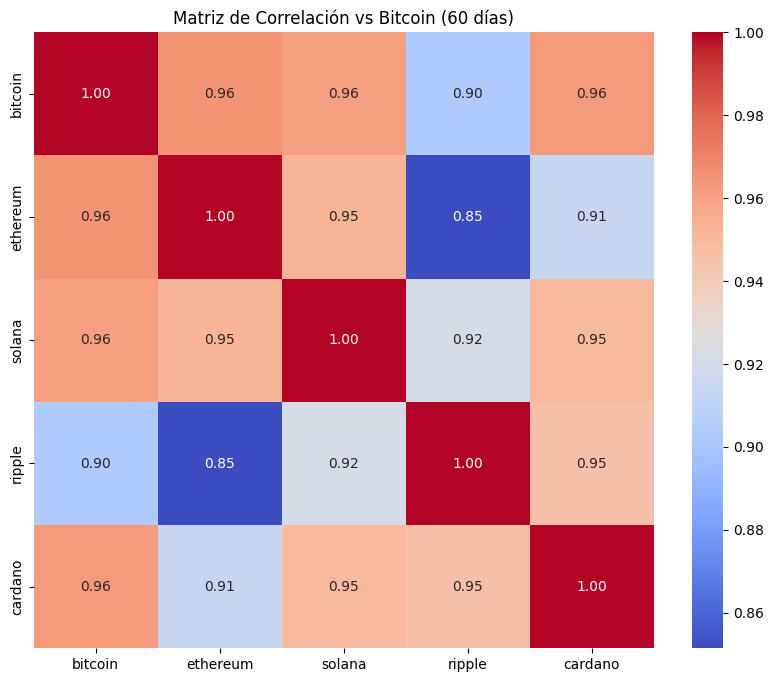


Correlación con Bitcoin:
bitcoin     1.000000
ethereum    0.964759
cardano     0.962617
solana      0.960899
ripple      0.903419
Name: bitcoin, dtype: float64


In [25]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analisis_correlacion():
    # 1. Lista de monedas a comparar
    monedas = ['bitcoin', 'ethereum', 'solana', 'ripple', 'cardano']
    datos_precios = {}

    print("Descargando datos...")
    for moneda in monedas:
        url = f"https://api.coingecko.com/api/v3/coins/{moneda}/market_chart"
        params = {'vs_currency': 'usd', 'days': '60', 'interval': 'daily'}
        res = requests.get(url, params=params)

        # Extraemos solo los precios de cierre
        datos_precios[moneda] = [p[1] for p in res.json()['prices']]

    # 2. Crear DataFrame y calcular correlación
    df = pd.DataFrame(datos_precios)
    matriz_corr = df.corr()

    # 3. Visualización (Mapa de calor)
    plt.figure(figsize=(14, 8))
    sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Matriz de Correlación vs Bitcoin (60 días)")
    plt.show()

    return matriz_corr

# Ejecutar
correlaciones = analisis_correlacion()
print("\nCorrelación con Bitcoin:")
print(correlaciones['bitcoin'].sort_values(ascending=False))


Fuerza de relación con Bitcoin (1.00 es máxima):
Obteniendo datos de mercado...


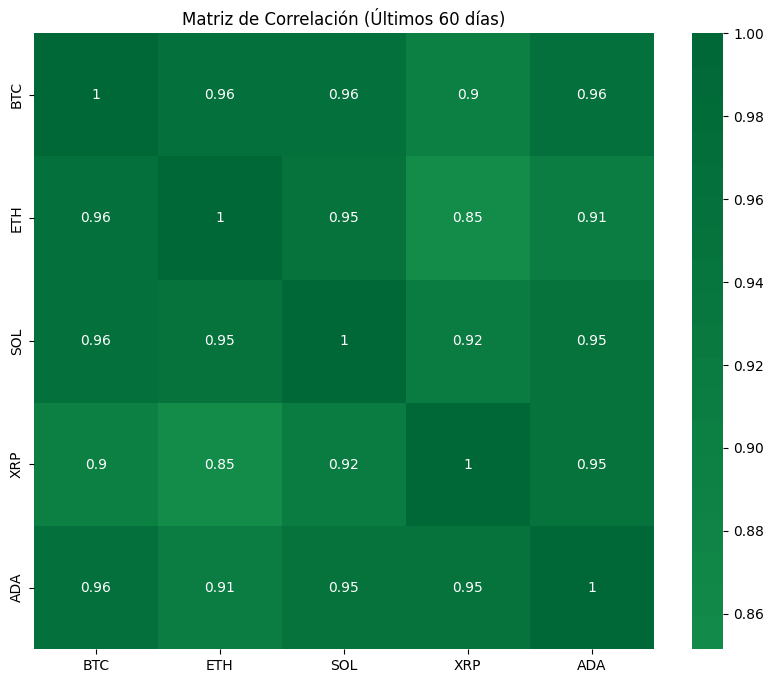

BTC    1.000000
ETH    0.964759
ADA    0.962610
SOL    0.960895
XRP    0.903400
Name: BTC, dtype: float64


In [26]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def analisis_correlacion():
    # 1. Definimos las monedas (usando sus IDs de API)
    monedas = {'bitcoin': 'BTC', 'ethereum': 'ETH', 'solana': 'SOL', 'ripple': 'XRP', 'cardano': 'ADA'}
    datos_precios = {}

    print("Obteniendo datos de mercado...")
    for id_api, ticker in monedas.items():
        url = f"https://api.coingecko.com/api/v3/coins/{id_api}/market_chart"
        params = {'vs_currency': 'usd', 'days': '60', 'interval': 'daily'}
        res = requests.get(url, params=params)

        # Extraemos solo el precio de cierre de cada día
        datos_precios[ticker] = [p[1] for p in res.json()['prices']]

    # 2. Crear tabla comparativa y calcular correlación de Pearson
    df = pd.DataFrame(datos_precios)
    matriz_corr = df.corr()

    # 3. Visualización con Mapa de Calor
    plt.figure(figsize=(10, 8))
    sns.heatmap(matriz_corr, annot=True, cmap='RdYlGn', center=0)
    plt.title("Matriz de Correlación (Últimos 60 días)")
    plt.show()

    return matriz_corr['BTC'].sort_values(ascending=False)

# Ejecutamos el análisis
print("\nFuerza de relación con Bitcoin (1.00 es máxima):")
print(analisis_correlacion())